# Week 9: Edge Detection


### Date : 16th December, 2021

Last week you learned about edge detection algorithms and how these can be used to find
interesting features on an image that can be used in applications such as stereo matching,
3D reconstruction, tracking, localization and recognition.

In [3]:
import numpy as np
import copy
import cv2
from matplotlib import pyplot as plt
import random
from PIL import Image
#to visualize the plots within the notebook
%matplotlib inline
# for making plots looking nicer
plt.style.use('default')
plt.style.use('fivethirtyeight')

## Task 1:

We would like to locate	the edges in the image as consistently and accurately as possible. Compute edge maps (i.e., follow the "Simple edge-detector" procedure from the lecture notes) for the image `lighthouse.png` using YOUR OWN:

a) Sobel edge detector (Sobel filters and thresholding)

b) Prewitt edge detector (Prewitt filters and thresholding)

c) An edge detector using derivative of Gaussian filtering in place of the Sobel/Prewitt kernels

d) The built-in Canny edge detector implemented in Matlab


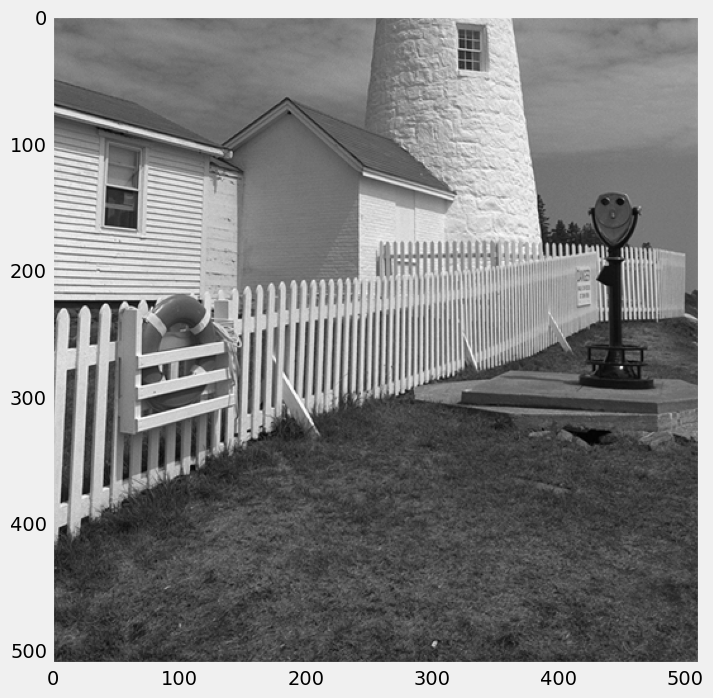

In [4]:
img = cv2.imread('../images/lighthouse.png')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.float32)
# Show original image
plt.figure(figsize=(8, 8))
plt.imshow(gray_img, "gray")
plt.grid(None)

In [5]:
# Implement your helper functions here. 
# Hint: you can use your implementations in lab week 6
def apply_filter(src_img, kernel):
    assert len(src_img.shape) == 2, print("Dimension mismatch! Please supply gray-scale image only!")
    assert len(kernel.shape) == 2, print("Dimension mismatch! Please supply 2D kernel only!")
    # code here
    kernel_height, kernel_width = kernel.shape
    img_height, img_width = src_img.shape

    # Initialize the output image
    rst_img = np.zeros((img_height - kernel_height + 1, img_width - kernel_width + 1))

    # Apply convolution (without padding)
    for i in range(rst_img.shape[0]):
        for j in range(rst_img.shape[1]):
            rst_img[i, j] = np.sum(src_img[i:i+kernel_height, j:j+kernel_width] * kernel)

    return rst_img

def get_sobel_kernel():
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    Ky = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    return Kx, Ky

def get_prewitt_kernel():
    Kx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    Ky = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
    return Kx, Ky

def get_gaussian_kernel(k, sigma):
    assert (k % 2 == 1), print("kernal size must be odd number!")
    # code here
    ax = np.linspace(-(k - 1) / 2., (k - 1) / 2., k)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sigma))
    G = kernel / np.sum(kernel)
    return G

### 1.a. Sobel filter

In [6]:
# Sobel edge detector (Sobel filters and thresholding)
# code here
# Get the Sobel kernels
sobel_kernel_x, sobel_kernel_y = get_sobel_kernel()
# Apply the x-direction Sobel kernel
G_sobel_x = apply_filter(gray_img, sobel_kernel_x)
# Apply the y-direction Sobel kernel
G_sobel_y = apply_filter(gray_img, sobel_kernel_y)
G_sobel = np.sqrt(np.square(G_sobel_x) + np.square(G_sobel_y))
G = G_sobel

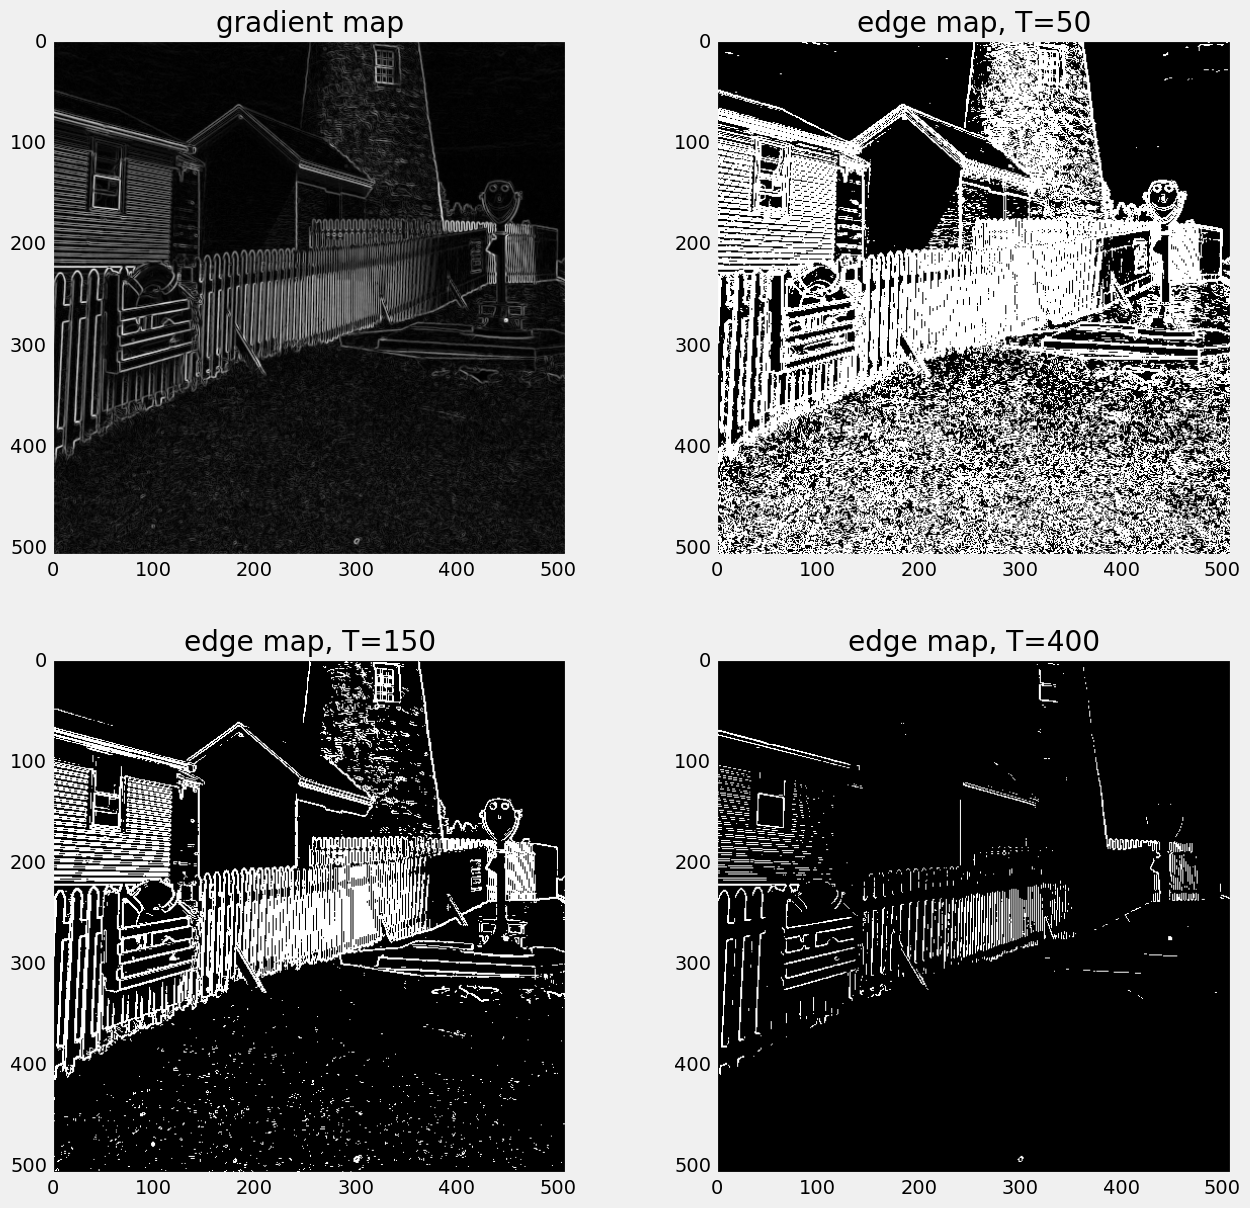

In [7]:
thresholds = [50, 150, 400]
# plot results
plt.figure(figsize=(14, 14))
ax1 = plt.subplot(2, 2, 1)
ax1.title.set_text("gradient map")
plt.imshow(G_sobel, "gray")
plt.grid(None)
ax2 = plt.subplot(2, 2, 2)
ax2.title.set_text("edge map, T={:d}".format(thresholds[0]))
plt.imshow((G > thresholds[0]).astype(np.uint8), "gray")
plt.grid(None)
ax3 = plt.subplot(2, 2, 3)
ax3.title.set_text("edge map, T={:d}".format(thresholds[1]))
plt.imshow((G > thresholds[1]).astype(np.uint8), "gray")
plt.grid(None)
ax4 = plt.subplot(2, 2, 4)
ax4.title.set_text("edge map, T={:d}".format(thresholds[2]))
plt.imshow((G > thresholds[2]).astype(np.uint8), "gray")
plt.grid(None)

### 1.b. Prewitt filter

In [8]:
# Prewitt edge detector (Prewitt filters and thresholding)
# code here
prewitt_kernel_x, prewitt_kernel_y = get_prewitt_kernel()
G_prewitt_x = apply_filter(gray_img, prewitt_kernel_x)
G_prewitt_y = apply_filter(gray_img, prewitt_kernel_y)
G_prewitt = np.sqrt(np.square(G_prewitt_x) + np.square(G_prewitt_y))
G = G_prewitt

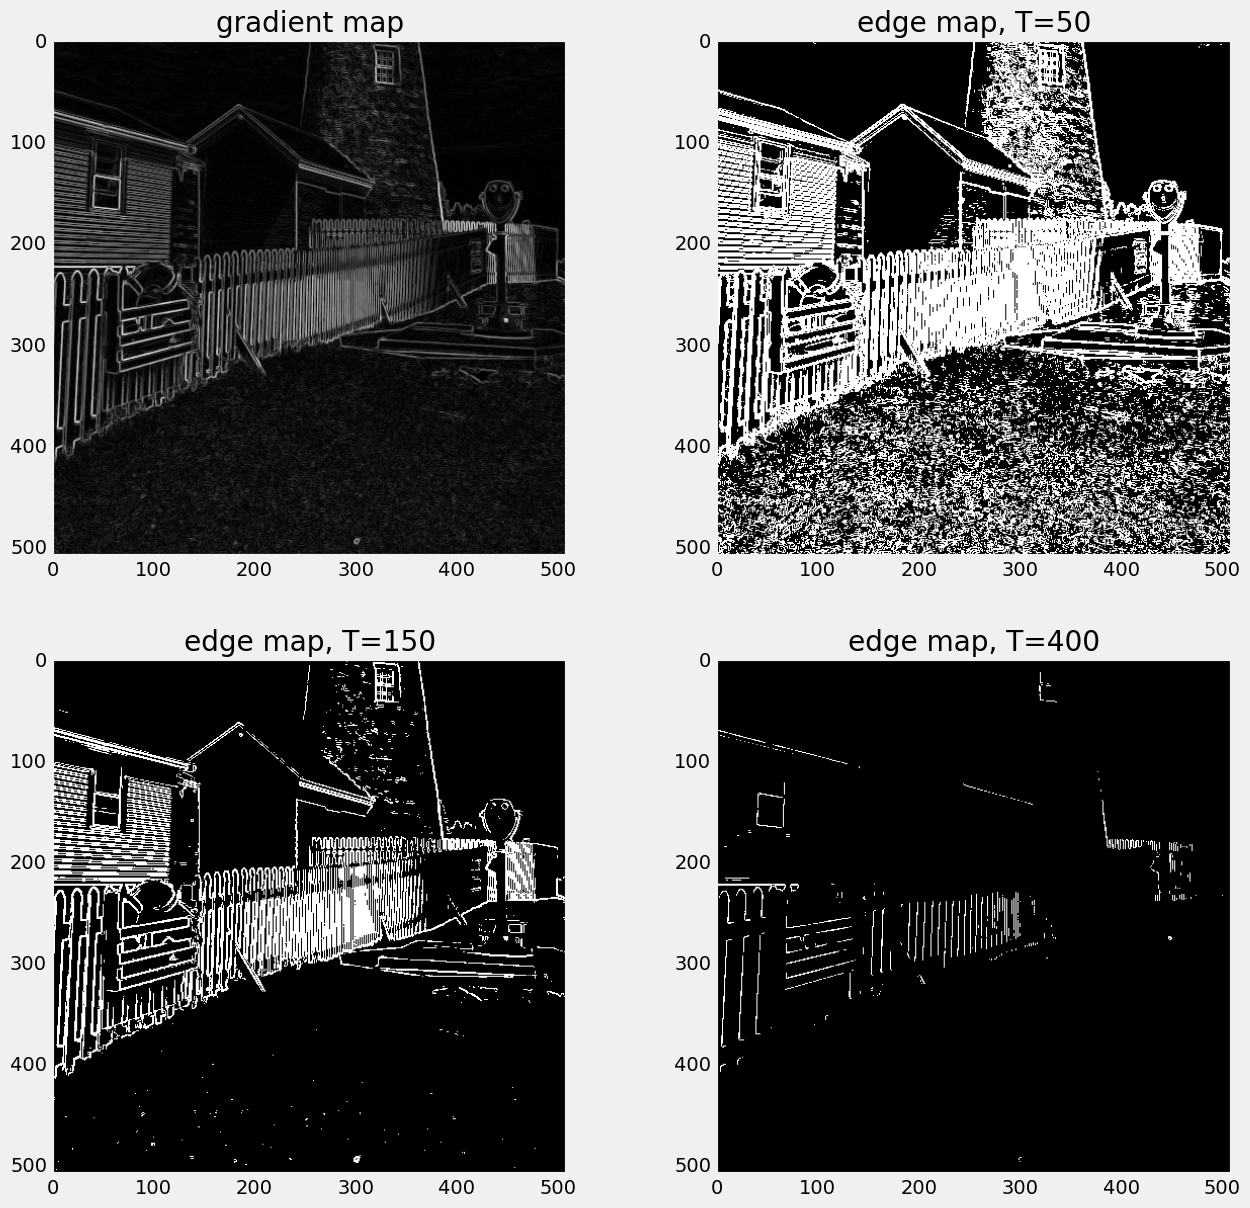

In [9]:
thresholds = [50, 150, 400]
# plot results
plt.figure(figsize=(14, 14))
ax1 = plt.subplot(2, 2, 1)
ax1.title.set_text("gradient map")
plt.imshow(G_prewitt, "gray")
plt.grid(None)
ax2 = plt.subplot(2, 2, 2)
ax2.title.set_text("edge map, T={:d}".format(thresholds[0]))
plt.imshow((G_prewitt > thresholds[0]).astype(np.uint8), "gray")
plt.grid(None)
ax3 = plt.subplot(2, 2, 3)
ax3.title.set_text("edge map, T={:d}".format(thresholds[1]))
plt.imshow((G_prewitt > thresholds[1]).astype(np.uint8), "gray")
plt.grid(None)
ax4 = plt.subplot(2, 2, 4)
ax4.title.set_text("edge map, T={:d}".format(thresholds[2]))
plt.imshow((G_prewitt > thresholds[2]).astype(np.uint8), "gray")
plt.grid(None)

### 1.c. Gaussian derivative

In [65]:
# def get_gaussian_derivative(k, sigma):
#     G = get_gaussian_kernel(k, sigma)
#     ax = np.linspace(-(k - 1) / 2., (k - 1) / 2., k)

#     # 计算x方向的高斯导数
#     Gx = -ax * G
#     # 正规化以保持总和为0
#     Gx = Gx / np.sum(np.abs(Gx))

#     ay = np.linspace(-(k - 1) / 2., (k - 1) / 2., k)
#     # 计算y方向的高斯导数
#     Gy = -ay[:, np.newaxis] * G
#     # 正规化以保持总和为0
#     Gy = Gy / np.sum(np.abs(Gy))
#     return Gx, Gy

def get_gaussian_derivative(k, sigma):
    G = get_gaussian_kernel(k, sigma)
    Gx = -np.outer(G[int(k/2)], np.linspace(-(k-1)/2, (k-1)/2, k)) / sigma**2
    # print(G[int(k/2)])
    # print(np.linspace(-(k-1)/2, (k-1)/2, k))
    # print(np.outer(G[int(k/2)], np.linspace(-(k-1)/2, (k-1)/2, k)))
    Gy = -np.outer(np.linspace(-(k-1)/2, (k-1)/2, k), G[int(k/2)]) / sigma**2
    return Gx, Gy



# first try gaussian kernel size=5, sigma=1.0
# code here
Gx, Gy = get_gaussian_derivative(5, 1.0)
Gx_gauss_1 = apply_filter(gray_img, Gx)
Gy_gauss_1 = apply_filter(gray_img, Gy)
G_gauss_1 = np.sqrt(Gx_gauss_1**2 + Gy_gauss_1**2)
# then try gaussian kernel size=5, sigma=5.0
#code here
Gx, Gy = get_gaussian_derivative(5, 5.0)
Gx_gauss_5 = apply_filter(gray_img, Gx)
Gy_gauss_5 = apply_filter(gray_img, Gy)
G_gauss_5 = np.sqrt(Gx_gauss_1**2 + Gy_gauss_1**2)


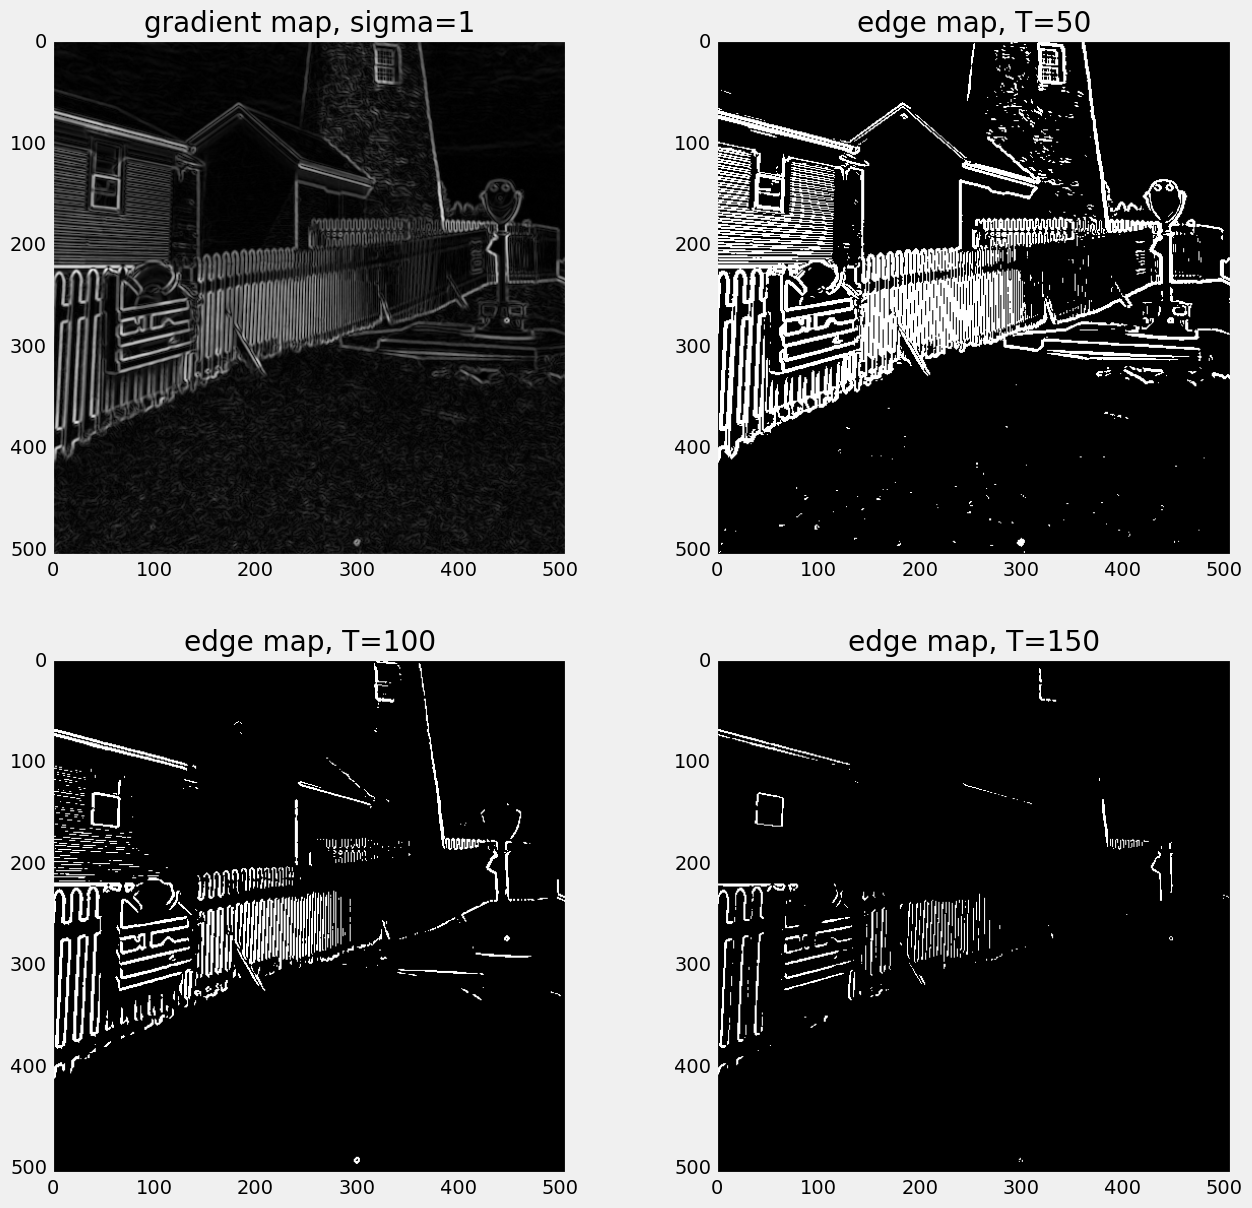

In [59]:
thresholds = [50, 100, 150]
# plot results
plt.figure(figsize=(14, 14))
ax1 = plt.subplot(2, 2, 1)
ax1.title.set_text("gradient map, sigma=1")
plt.imshow(G_gauss_1, "gray")
plt.grid(None)
ax2 = plt.subplot(2, 2, 2)
ax2.title.set_text("edge map, T={:d}".format(thresholds[0]))
plt.imshow((G_gauss_1 > thresholds[0]).astype(np.uint8), "gray")
plt.grid(None)
ax3 = plt.subplot(2, 2, 3)
ax3.title.set_text("edge map, T={:d}".format(thresholds[1]))
plt.imshow((G_gauss_1 > thresholds[1]).astype(np.uint8), "gray")
plt.grid(None)
ax4 = plt.subplot(2, 2, 4)
ax4.title.set_text("edge map, T={:d}".format(thresholds[2]))
plt.imshow((G_gauss_1 > thresholds[2]).astype(np.uint8), "gray")
plt.grid(None)

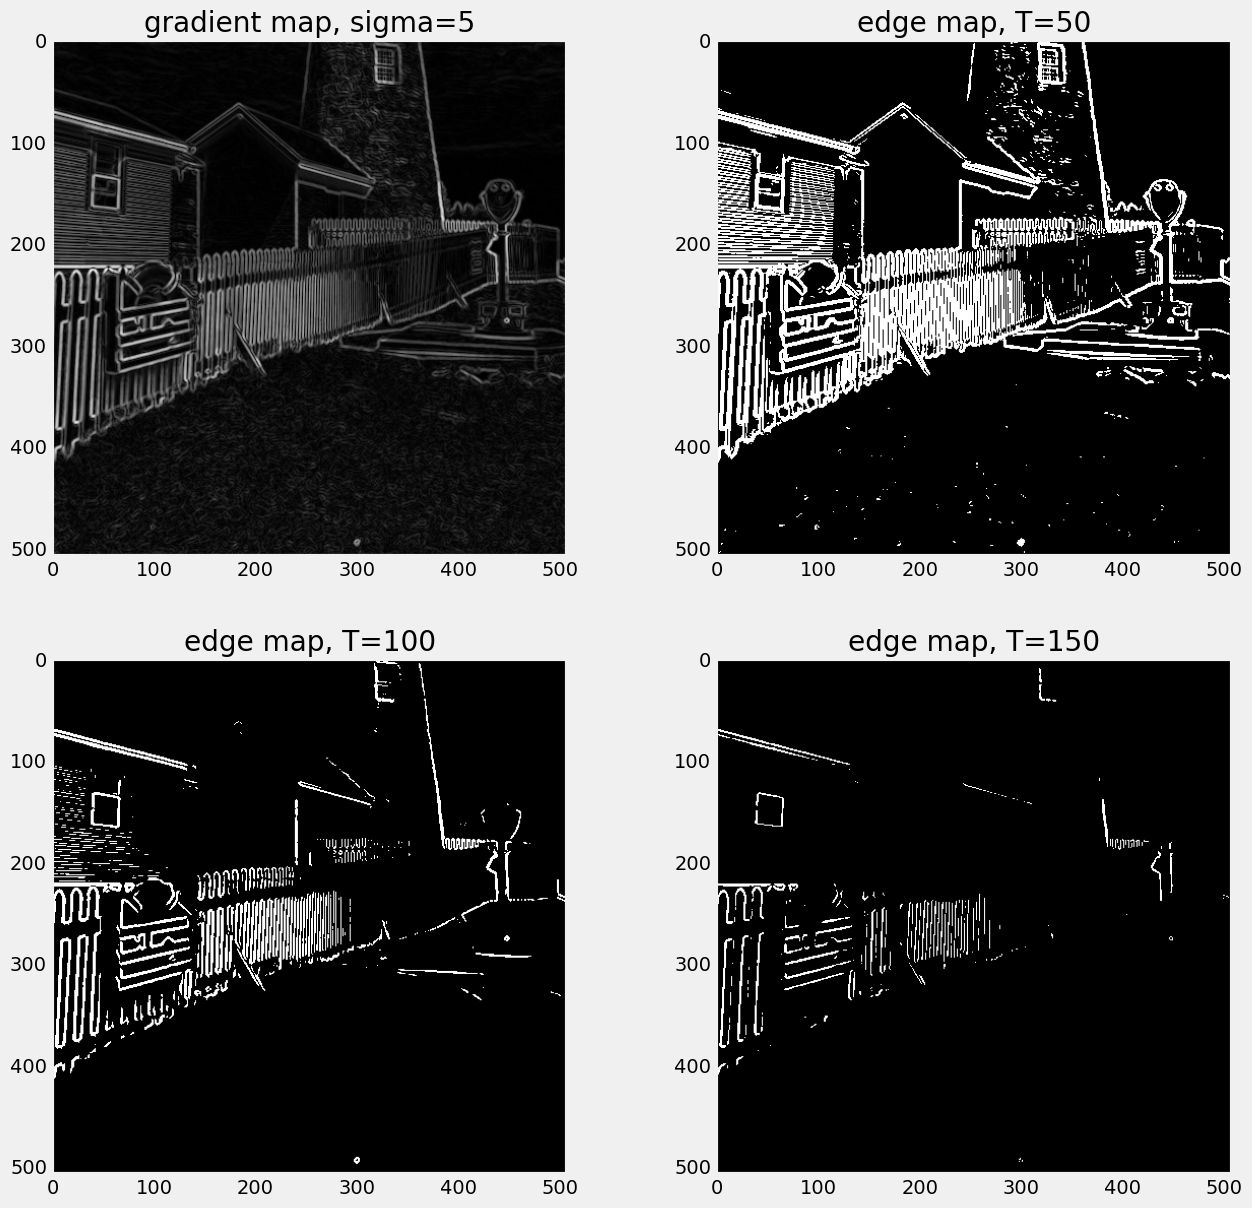

In [60]:
thresholds = [50, 100, 150]
# plot results
plt.figure(figsize=(14, 14))
ax1 = plt.subplot(2, 2, 1)
ax1.title.set_text("gradient map, sigma=5")
plt.imshow(G_gauss_5, "gray")
plt.grid(None)
ax2 = plt.subplot(2, 2, 2)
ax2.title.set_text("edge map, T={:d}".format(thresholds[0]))
plt.imshow((G_gauss_5 > thresholds[0]).astype(np.uint8), "gray")
plt.grid(None)
ax3 = plt.subplot(2, 2, 3)
ax3.title.set_text("edge map, T={:d}".format(thresholds[1]))
plt.imshow((G_gauss_5 > thresholds[1]).astype(np.uint8), "gray")
plt.grid(None)
ax4 = plt.subplot(2, 2, 4)
ax4.title.set_text("edge map, T={:d}".format(thresholds[2]))
plt.imshow((G_gauss_5 > thresholds[2]).astype(np.uint8), "gray")
plt.grid(None)

### 1.d. The built-in Canny edge detector in OpenCV
You will need to use cv2.Canny() function. Figure out how to use it yourself.

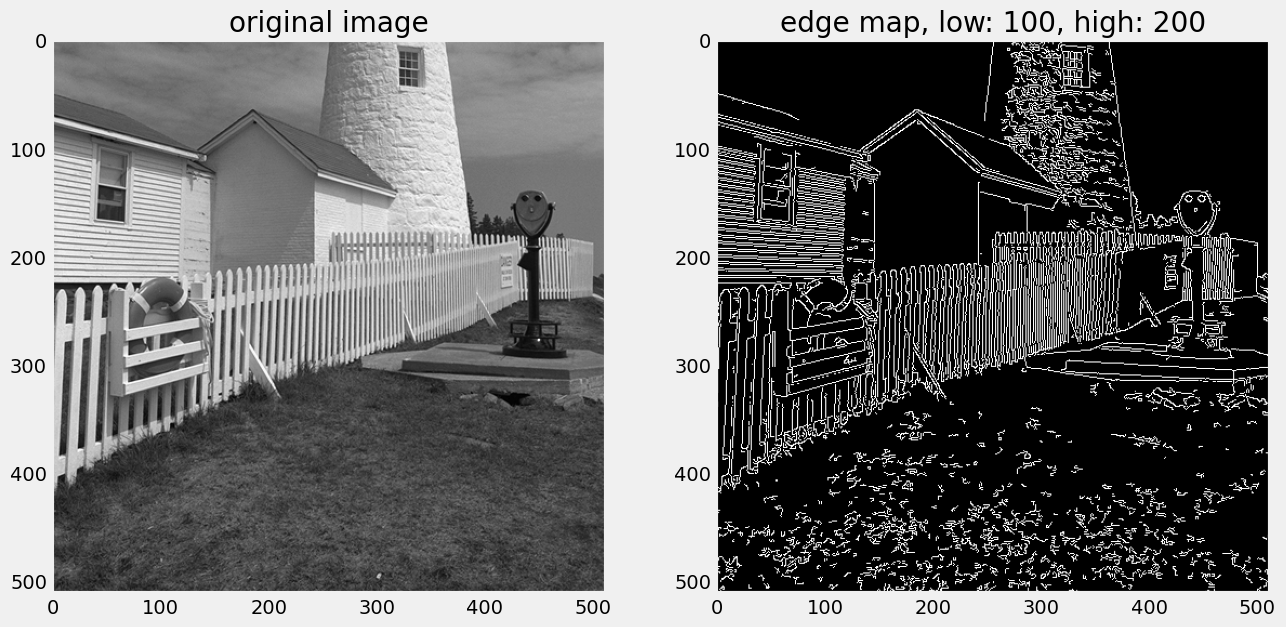

In [61]:
# code here
th_lo = 100
th_hi = 200
gray_img = (gray_img / gray_img.max() * 255).astype('uint8')
edges = cv2.Canny(gray_img, th_lo, th_hi)

# plot results
plt.figure(figsize=(14, 14))
ax1 = plt.subplot(1, 2, 1)
ax1.title.set_text("original image")
plt.imshow(gray_img, "gray")
plt.grid(None)
ax2 = plt.subplot(1, 2, 2)
ax2.title.set_text("edge map, low: {:d}, high: {:d}".format(th_lo, th_hi))
plt.imshow(edges, "gray")
plt.grid(None)

## Task 2: Non-maximal suppression

Implement a non-maximal suppression algorithm and use it on the responses of the filters you used in c) above. Then using fft2 function	plot the phase and magnitude of the suppressed image for different suppression parameters (e.g., threshold or connectivity type). Comment on your findings.

Hint: You can round the gradient angle into 0, 45, 90 and 135 degrees and only check along those for directions.

hint: you may find the OpenCV doc helpful: https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html

In [69]:
# Implement your functions here
import copy
from scipy.ndimage import label

def non_maximal_supp(Gx, Gy, G):
    # code here
    # 计算梯度方向:
    angle = np.arctan2(Gy, Gx) * 180 / np.pi
    angle[angle < 0] += 180

    out_gradients = np.zeros(G.shape)
    M, N = G.shape

    for i in range(1, M-1):
        for j in range(1, N-1):
            q = 255
            r = 255
            # 对于图像 G 中的每个像素，根据其梯度方向判断该像素与哪两个相邻像素比较。
            # 角度四舍五入到 0, 45, 90, 135 度
            if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                q = G[i, j+1]
                r = G[i, j-1]
            elif 22.5 <= angle[i, j] < 67.5:
                q = G[i+1, j-1]
                r = G[i-1, j+1]
            elif 67.5 <= angle[i, j] < 112.5:
                q = G[i+1, j]
                r = G[i-1, j]
            elif 112.5 <= angle[i, j] < 157.5:
                q = G[i-1, j-1]
                r = G[i+1, j+1]

            # 只有当当前像素的梯度大于或等于这两个相邻像素的梯度时，它才被保留为边缘像素，否则它的梯度被设为0。
            if (G[i, j] >= q) and (G[i, j] >= r):
                out_gradients[i, j] = G[i, j]

    return out_gradients        


def dfs(img, i, j, lo, connectivity=8):
    """
    Depth First Search to propagate strong edges.
    """
    h, w = img.shape
    if i < 0 or j < 0 or i >= h or j >= w or img[i, j] < lo:
        return
    img[i, j] = 1  # Mark as visited/strong edge

    # 8-neighbor connectivity
    if connectivity == 8:
        neighbors = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
    elif connectivity == 4:
        neighbors = [(-1, 0), (0, -1), (0, 1), (1, 0)]

    # Visit neighbors
    for di, dj in neighbors:
        dfs(img, i + di, j + dj, lo, connectivity)
    

def hyst_threshold(G, lo, hi, connectivity=8):
    # code here
    # 首先，所有大于高阈值 hi 的像素被标记为强边缘。
    strong_edges = (G > hi)
    edges = np.zeros(G.shape, dtype=bool)
    edges[(G > lo)] = True

    # Apply DFS for each strong edge
    # 使用 dfs 函数从强边缘开始，将与强边缘相连的所有大于低阈值 lo 的边缘也标记为边缘。
    for i in range(G.shape[0]):
        for j in range(G.shape[1]):
            if strong_edges[i, j]:
                dfs(edges, i, j, lo, connectivity)

    return edges

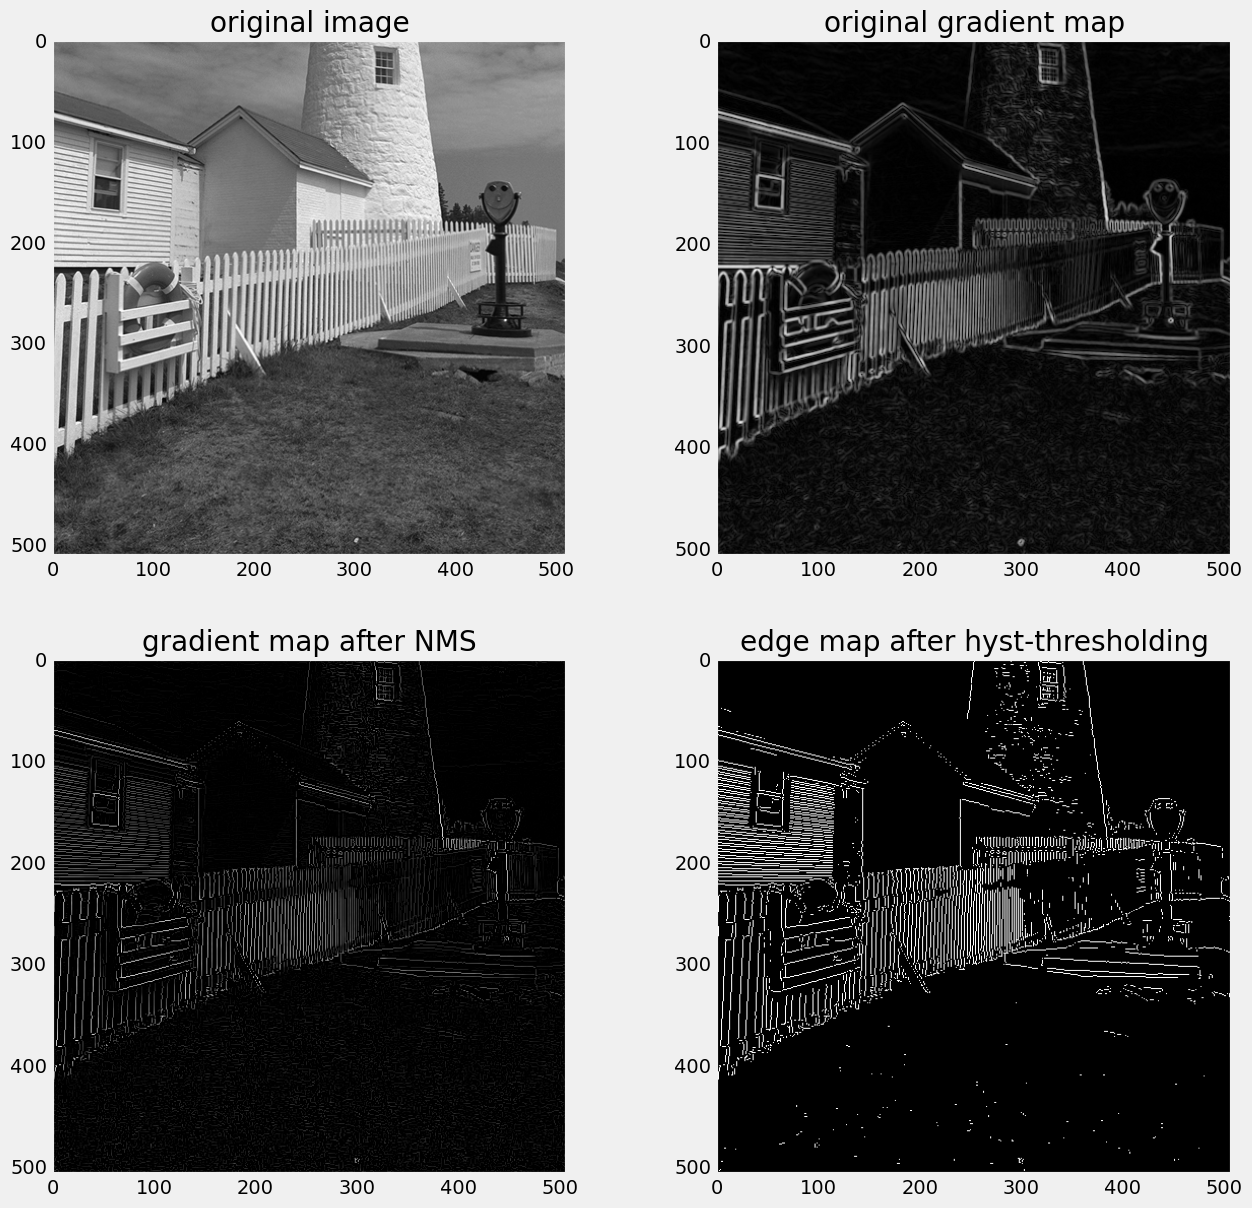

In [70]:
G_nm = non_maximal_supp(Gx_gauss_1, Gy_gauss_1, G_gauss_1)
edge_map = hyst_threshold(G_nm, 50, 100)
# plot results
plt.figure(figsize=(14, 14))
ax1 = plt.subplot(2, 2, 1)
ax1.title.set_text("original image")
plt.imshow(gray_img, "gray")
plt.grid(None)
ax2 = plt.subplot(2, 2, 2)
ax2.title.set_text("original gradient map")
plt.imshow(G_gauss_1, "gray")
plt.grid(None)
ax3 = plt.subplot(2, 2, 3)
ax3.title.set_text("gradient map after NMS")
plt.imshow(G_nm, "gray")
plt.grid(None)
ax4 = plt.subplot(2, 2, 4)
ax4.title.set_text("edge map after hyst-thresholding")
plt.imshow(edge_map, "gray")
plt.grid(None)

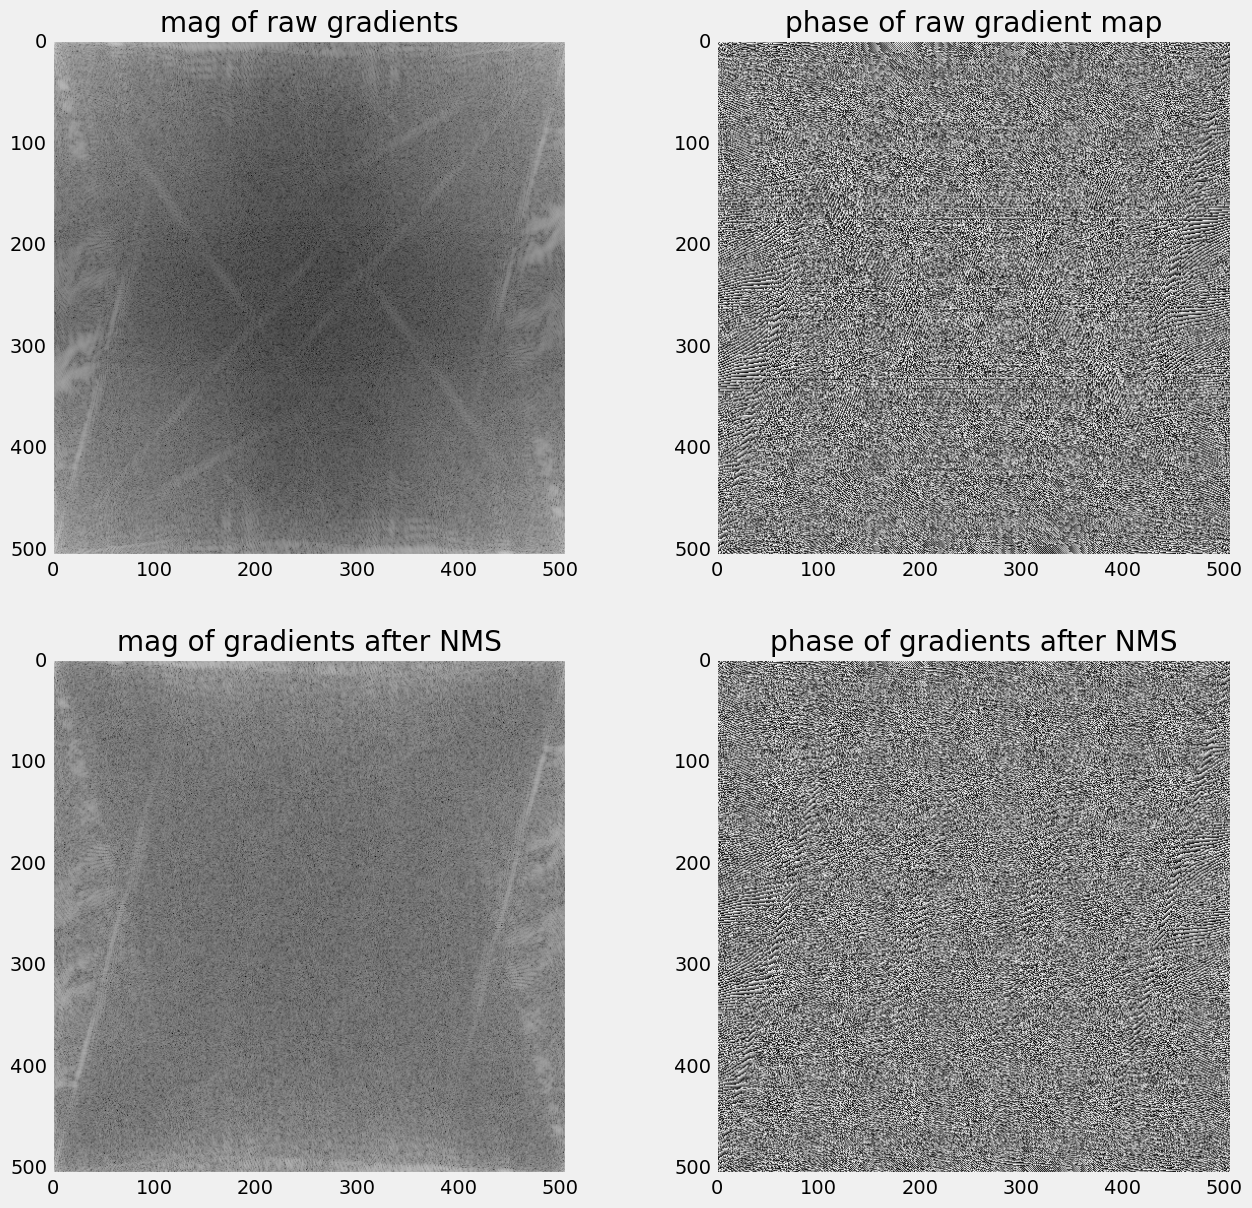

In [64]:
fft_G = np.fft.fft2(G_gauss_1)
G_mag = np.abs(fft_G)
G_phase = np.angle(fft_G)
fft_G_nm = np.fft.fft2(G_nm)
G_nm_mag = np.abs(fft_G_nm)
G_nm_phase = np.angle(fft_G_nm)
# plot results
plt.figure(figsize=(14, 14))
ax1 = plt.subplot(2, 2, 1)
ax1.title.set_text("mag of raw gradients")
plt.imshow(np.log(G_mag), "gray")
plt.grid(None)
ax2 = plt.subplot(2, 2, 2)
ax2.title.set_text("phase of raw gradient map")
plt.imshow(G_phase, "gray")
plt.grid(None)
ax3 = plt.subplot(2, 2, 3)
ax3.title.set_text("mag of gradients after NMS")
plt.imshow(np.log(G_nm_mag), "gray")
plt.grid(None)
ax4 = plt.subplot(2, 2, 4)
ax4.title.set_text("phase of gradients after NMS")
plt.imshow(G_nm_phase, "gray")
plt.grid(None)